In [1]:
# Import relevent packages: Panda, numpy, matplotlib and pydst
# Note: Sometimes you need to run code 2 times, before yoour packages will be uploaded

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydst
dst = pydst.Dst(lang = 'da') # Lang = Danish

In [2]:
# Get columns dictionary from DST
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

In [3]:
var_dict = {} # var is for variable

# Get variable dictionary from DST
var_dict['B.1*g Bruttpmationalprodukt, BNP'] = 'Y'
var_dict['P.31 Privatforbrug'] = 'C'
var_dict['P.3 Offentlige forbrugsudgifter'] = 'G'
var_dict['P.5g Bruttoinvesteringer'] = 'I'
var_dict['P.6 Eksport af varer og tjenester'] = 'X'
var_dict['P.7 Import af varer og tjenester'] = 'M'

In [4]:
# UNITS
unit_dict = {}
unit_dict['2010-priser, kædede værdier'] = 'realle'
unit_dict['løbende priser'] = 'nominelle'


In [5]:
# CODE. There is a bug in the code, where you get the desired year + start year.
nan1 = dst.get_data(table_id = 'NAN1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})
nan1.rename(columns = columns_dict, inplace = True)

In [6]:
# Following loops get items from our variable and value list, defined on lines 21 to 26
# and 30 to 32
for key,value in var_dict.items():
    nan1.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
    nan1.unit.replace(key,value, inplace=True)

I = False
for key,value in var_dict.items():
    I = I | (nan1.variable == value)
nan1 = nan1[I]

In [7]:
# Basic discriptive stats
nan1.groupby(['variable','unit']).describe()

year          \
                                                            count    mean   
variable unit                                                               
C        2010-priser, kædede værdier, (mia. kr.)             53.0  1992.0   
         Bidrag til realvækst i BNP, (procentpoint)          53.0  1992.0   
         Løbende priser, (mia. kr.)                          53.0  1992.0   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  53.0  1992.0   
         Pr. indbygger, løbende priser, (1000 kr.)           53.0  1992.0   
         Realvækst i pct. i forhold til foregående periode   53.0  1992.0   
G        2010-priser, kædede værdier, (mia. kr.)             53.0  1992.0   
         Bidrag til realvækst i BNP, (procentpoint)          53.0  1992.0   
         Løbende priser, (mia. kr.)                          53.0  1992.0   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  53.0  1992.0   
         Pr. indbygger, løbende priser, (1000 kr.)           53.0  1992.0   
         Realvækst i pct. i forhold til foregående periode   53.0  1992.0   
I        2010-priser, kædede værdier, (mia. kr.)             53.0  1992.0   
         Bidrag til realvækst i BNP, (procentpoint)          53.0  1992.0   
         Løbende priser, (mia. kr.)                          53.0  1992.0   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  53.0  1992.0   
         Pr. indbygger, løbende priser, (1000 kr.)           53.0  1992.0   
         Realvækst i pct. i forhold til foregående periode   53.0  1992.0   
M        2010-priser, kædede værdier, (mia. kr.)             53.0  1992.0   
         Bidrag til realvækst i BNP, (procentpoint)          53.0  1992.0   
         Løbende priser, (mia. kr.)                          53.0  1992.0   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  53.0  1992.0   
         Pr. indbygger, løbende priser, (1000 kr.)           53.0  1992.0   
         Realvækst i pct. i forhold til foregående periode   53.0  1992.0   
X        2010-priser, kædede værdier, (mia. kr.)             53.0  1992.0   
         Bidrag til realvækst i BNP, (procentpoint)          53.0  1992.0   
         Løbende priser, (mia. kr.)                          53.0  1992.0   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  53.0  1992.0   
         Pr. indbygger, løbende priser, (1000 kr.)           53.0  1992.0   
         Realvækst i pct. i forhold til foregående periode   53.0  1992.0   

                                                                        \
                                                                   std   
variable unit                                                            
C        2010-priser, kædede værdier, (mia. kr.)             15.443445   
         Bidrag til realvækst i BNP, (procentpoint)          15.443445   
         Løbende priser, (mia. kr.)                          15.443445   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  15.443445   
         Pr. indbygger, løbende priser, (1000 kr.)           15.443445   
         Realvækst i pct. i forhold til foregående periode   15.443445   
G        2010-priser, kædede værdier, (mia. kr.)             15.443445   
         Bidrag til realvækst i BNP, (procentpoint)          15.443445   
         Løbende priser, (mia. kr.)                          15.443445   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  15.443445   
         Pr. indbygger, løbende priser, (1000 kr.)           15.443445   
         Realvækst i pct. i forhold til foregående periode   15.443445   
I        2010-priser, kædede værdier, (mia. kr.)             15.443445   
         Bidrag til realvækst i BNP, (procentpoint)          15.443445   
         Løbende priser, (mia. kr.)                          15.443445   
         Pr. indbygger, 2010-priser, kædede værdier, (10...  15.443445   
         Pr. indbygger, løbende priser, (1000 kr.)           15.443445   
         Realvækst i pct. i forhold til

In [9]:
# We create a new variable 'X', where we select data from year 2001 and onwards
X = nan1["year"]>2000  
nan1 = nan1[X]
# We define which unit we will work with.
K=nan1["unit"]=="Pr. indbygger, løbende priser, (1000 kr.)"
nan1 = nan1[K]
# At last we recreate our data from dst to be a DataFrame
df=pd.DataFrame(data=nan1)

In [10]:
# Sort values first by year and then by variable type
df.sort_values(by=["year","variable"])

# Replace old index with our new index. We use year as index in our case
df.set_index(['year'], inplace=True)
df.sort_index(inplace=True)

# In our data, all values where strings. As such we need to make value numbers into floats instead of strings
df["value"]=df["value"].str.replace(",",".").astype(float)

In [11]:
# As we do not have data for Net Export, we need to make this variable. Just like before we make it a float
# Note: This new variable is not a dataFrame
NX = pd.to_numeric(df.loc[:,:].value[df.loc[:,:].variable == "X" ]) - pd.to_numeric(df.loc[:,:].value[df.loc[:,:].variable == "M" ])
NX.columns=["year","value"]

In [12]:
# Defining our new variable as a dataFrame var. 
NX=pd.DataFrame(data=NX)
NX["variable"] ="NX"

In [13]:
NX

,value,variable
year,,
2001,18.3,NX
2002,18.0,NX
2003,18.1,NX
2004,15.7,NX
2005,16.1,NX
2006,12.7,NX
2007,9.2,NX
2008,11.6,NX
2009,14.1,NX


In [14]:
# Next we use Pandas function 'concat' to add Net Export to our DataFrame. We call this dataset for "dollo"
dollo= pd.concat([df, NX])
# We sort our dollo data set
dollo.sort_index(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [15]:
# As we have the new variable 'Net Export', we remove import and export
dollo=dollo[dollo.variable !='X']
dollo=dollo[dollo.variable !='M']
# Sort by year and var.
dollo.sort_values(by=["year","variable"])

,unit,value,variable
year,,,
2001,"Pr. indbygger, løbende priser, (1000 kr.)",119.6,C
2001,"Pr. indbygger, løbende priser, (1000 kr.)",62.3,G
2001,"Pr. indbygger, løbende priser, (1000 kr.)",55.9,I
2001,NaN,18.3,NX
2002,"Pr. indbygger, løbende priser, (1000 kr.)",123.1,C
2002,"Pr. indbygger, løbende priser, (1000 kr.)",65.2,G
2002,"Pr. indbygger, løbende priser, (1000 kr.)",56.0,I
2002,NaN,18.0,NX
2003,"Pr. indbygger, løbende priser, (1000 kr.)",125.9,C


In [16]:
# We realised that we lack data for GDP in total, we make a new variable 'Y', which is a sum of other variables
Y = pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable == 'C']) + pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable== 'G']) + pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable== 'I'])  + pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable== 'NX'])
Y.columns=['year','value']


In [17]:
# Just like with NX, we define the new variable as a dataFrame
Y = pd.DataFrame(data=Y)
Y['variable'] = 'Y'

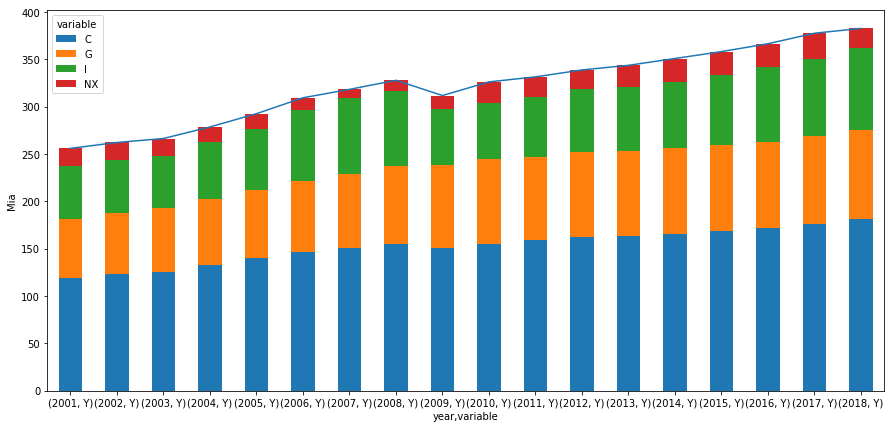

In [18]:
# Next lines make our graph
fig, ax = plt.subplots(figsize=(15,7))
dollo.groupby(['year','variable']).sum()['value'].unstack().plot(ax=ax, kind='bar', stacked = True)
ax.set_xlabel('year')
ax.set_ylabel('Mia')
Y.groupby(['year','variable']).sum()['value'].plot(ax=ax)